In [1]:
from numpy.random import default_rng as random_number_generator
from tp.schelling import mercado_inmobiliario
from tp.util import simulador
import numpy as np

def criterio_equilibrio(serie: np.ndarray[float], lag: int, tol: float) -> bool:
    """
    Define cuando una serie temporal se encuentra en equilibrio
    """
    
    L = len(serie)
    if L <= lag:
        return False
    
    for i in range(L-1-lag , L-1):
        if np.abs((serie[i] - serie[i-1])/serie[i-1]) >= tol:
            return False
        
    return True

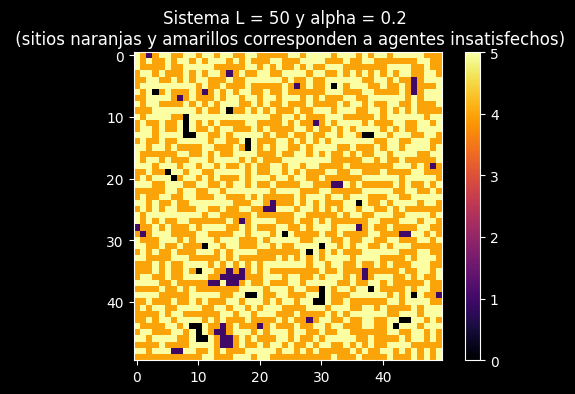

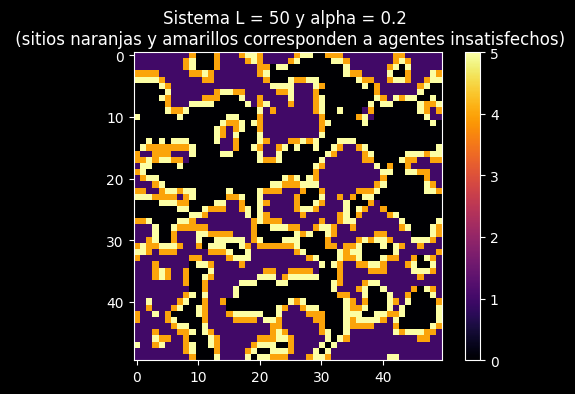

In [2]:
rng = random_number_generator(seed=1)
modelo = mercado_inmobiliario(L=50, alpha=.2, rng=rng)
sim = simulador(modelo, criterio_equilibrio, max_steps=20, lag=20, tol=1E-3)
modelo.lattice_plot()
sim.run()
modelo.lattice_plot()